# Do PCA manually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualization_savefig(mat, figname):
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    ax.set_axis_off()
    plt.colorbar(im)
    fig.savefig(figname)
    plt.show()

In [4]:
# part (a)
three = pd.read_csv('three.txt', delimiter=' ', header=None)
three.drop(three.columns[256],axis=1, inplace=True)
line = 0
three_line1 = np.array(three.iloc[line, :])
# visualization_savefig(three_line1.reshape([16, 16], order='F'), "fig1a_three.pdf")
# figa1, axa1 = plt.subplots()
# axa1.imshow(three_line1.reshape([16, 16], order='F'))
# figa1.show()
eight = pd.read_csv('eight.txt', delimiter=' ', header=None)
eight.drop(eight.columns[256],axis=1, inplace=True)
line = 0
eight_line1 = np.array(eight.iloc[line, :])
# figa2, axa2 = plt.subplots()
# axa2.imshow(eight_line1.reshape([16, 16], order='F'))
# figa2.show()
# visualization_savefig(eight_line1.reshape([16, 16], order='F'), "fig1b_eight.pdf")

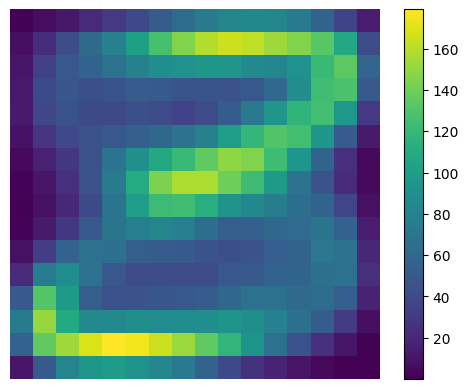

In [7]:
# part (b)
x = np.vstack((np.array(three), np.array(eight)))
x_bar = x.mean(axis=0)
visualization_savefig(x_bar.reshape([16, 16], order='F'), "fig2_x_bar.pdf")

In [8]:
x_bar.shape

(256,)

In [14]:
# part (c)
x_centered = x - x_bar
n = x_centered.shape[0]
S = np.dot(x_centered.transpose(), x_centered) / (n - 1)
print(np.round(S[:5, :5], 3))
# [[  59.16729323  142.14943609   28.68201754   -7.17857143  -14.3358396 ]
#  [ 142.14943609  878.93879073  374.13731203   24.12778195  -87.12781955]
#  [  28.68201754  374.13731203 1082.9058584   555.2268797    33.72431078]
#  [  -7.17857143   24.12778195  555.2268797  1181.24408521  777.77192982]
#  [ -14.3358396   -87.12781955   33.72431078  777.77192982 1429.95989975]]

[[  59.167  142.149   28.682   -7.179  -14.336]
 [ 142.149  878.939  374.137   24.128  -87.128]
 [  28.682  374.137 1082.906  555.227   33.724]
 [  -7.179   24.128  555.227 1181.244  777.772]
 [ -14.336  -87.128   33.724  777.772 1429.96 ]]


[237155.246 145188.353]


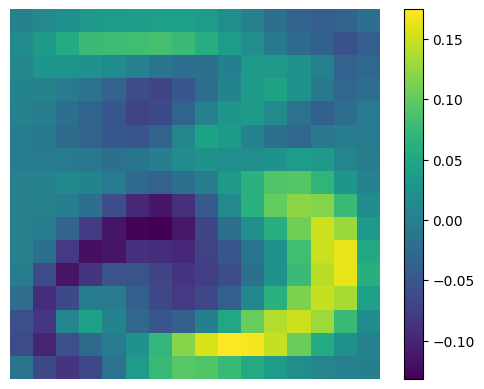

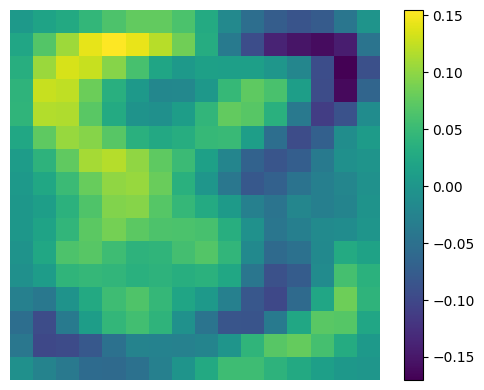

In [28]:
# part (d)
w, v = np.linalg.eig(S)
ind = w.argsort()[-2:][::-1]

v1 = v.T[ind[0]]
v2 = v.T[ind[1]]
print(np.round(w[ind], 3))
# center and re-scale the image
visualization_savefig(v1.reshape((16, 16), order='F'), "fig4a_v1.pdf")
visualization_savefig(v2.reshape((16, 16), order='F'), "fig4b_v2.pdf")

In [16]:
np.cov(x_centered.transpose())

array([[ 5.91672932e+01,  1.42149436e+02,  2.86820175e+01, ...,
         7.74107143e+01,  1.45341479e+01,  3.97869674e-02],
       [ 1.42149436e+02,  8.78938791e+02,  3.74137312e+02, ...,
         4.01587550e+02,  1.26541873e+02,  4.45093985e-01],
       [ 2.86820175e+01,  3.74137312e+02,  1.08290586e+03, ...,
         2.51275345e+02,  8.10344298e+01, -1.43796992e-02],
       ...,
       [ 7.74107143e+01,  4.01587550e+02,  2.51275345e+02, ...,
         8.36424555e+02,  2.23766222e+02,  4.62850877e-01],
       [ 1.45341479e+01,  1.26541873e+02,  8.10344298e+01, ...,
         2.23766222e+02,  9.52927256e+01,  2.52136591e-01],
       [ 3.97869674e-02,  4.45093985e-01, -1.43796992e-02, ...,
         4.62850877e-01,  2.52136591e-01,  2.50000000e-03]])

# do PCA with Sebastian

In [17]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [19]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std -mean_vec)) / (x_std.shape[0] - 1)
cov_mat

array([[ 1.00250627,  0.62490222,  0.11359536, ...,  0.34884615,
         0.19404656,  0.10370915],
       [ 0.62490222,  1.00250627,  0.38445317, ...,  0.4695422 ,
         0.43834107,  0.30101594],
       [ 0.11359536,  0.38445317,  1.00250627, ...,  0.26468433,
         0.25288988, -0.00876136],
       ...,
       [ 0.34884615,  0.4695422 ,  0.26468433, ...,  1.00250627,
         0.79458134,  0.32088159],
       [ 0.19404656,  0.43834107,  0.25288988, ...,  0.79458134,
         1.00250627,  0.51787279],
       [ 0.10370915,  0.30101594, -0.00876136, ...,  0.32088159,
         0.51787279,  1.00250627]])

In [23]:
np.cov(x_std.T)

array([[ 1.00250627,  0.62490222,  0.11359536, ...,  0.34884615,
         0.19404656,  0.10370915],
       [ 0.62490222,  1.00250627,  0.38445317, ...,  0.4695422 ,
         0.43834107,  0.30101594],
       [ 0.11359536,  0.38445317,  1.00250627, ...,  0.26468433,
         0.25288988, -0.00876136],
       ...,
       [ 0.34884615,  0.4695422 ,  0.26468433, ...,  1.00250627,
         0.79458134,  0.32088159],
       [ 0.19404656,  0.43834107,  0.25288988, ...,  0.79458134,
         1.00250627,  0.51787279],
       [ 0.10370915,  0.30101594, -0.00876136, ...,  0.32088159,
         0.51787279,  1.00250627]])

In [24]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [25]:
eig_vals

array([3.08697491e+01, 2.03505144e+01, 1.64004646e+01, 1.28178580e+01,
       9.63685769e+00, 8.98588537e+00, 8.37116047e+00, 7.71374427e+00,
       6.71468063e+00, 6.41973620e+00, 6.34901014e+00, 5.41459676e+00,
       5.44131760e+00, 4.56783585e+00, 4.15984890e+00, 3.94916223e+00,
       3.55695478e+00, 3.36825840e+00, 3.26671091e+00, 3.05736234e+00,
       2.68322071e+00, 2.64085917e+00, 2.49953021e+00, 2.43162918e+00,
       2.31588741e+00, 2.23004754e+00, 2.19852024e+00, 2.04211879e+00,
       2.00665103e+00, 1.89500500e+00, 1.88265321e+00, 1.77489680e+00,
       1.72967940e+00, 1.69532368e+00, 1.62057956e+00, 1.58751038e+00,
       1.53290016e+00, 1.45668210e+00, 1.43843695e+00, 1.34969697e+00,
       1.29522186e+00, 1.27332753e+00, 1.22925786e+00, 1.19974592e+00,
       1.12781088e+00, 1.09008488e+00, 1.07525988e+00, 1.02349721e+00,
       9.94339390e-01, 9.97643201e-01, 9.14455717e-01, 8.64360133e-01,
       8.50477882e-01, 8.08443937e-01, 7.99052449e-01, 7.77798343e-01,
      

In [26]:
eig_vecs

array([[-0.0479217 , -0.03285987,  0.04565585, ..., -0.01922973,
        -0.00604673,  0.00654901],
       [-0.06659858, -0.05765052,  0.05263646, ...,  0.0186527 ,
        -0.01643417,  0.00910429],
       [-0.0474617 , -0.08562924,  0.012033  , ..., -0.00258395,
         0.01170449,  0.0558069 ],
       ...,
       [-0.07646481, -0.06557333,  0.08274697, ...,  0.04746816,
        -0.02574284, -0.02420807],
       [-0.04627782, -0.05826814,  0.06547508, ..., -0.02359407,
        -0.03195525,  0.00078022],
       [-0.01720909, -0.01753259,  0.04329733, ..., -0.0621563 ,
        -0.06762859, -0.00255083]])

In [27]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


# double check the manul solution

[[  59.167  142.149   28.682   -7.179  -14.336]
 [ 142.149  878.939  374.137   24.128  -87.128]
 [  28.682  374.137 1082.906  555.227   33.724]
 [  -7.179   24.128  555.227 1181.244  777.772]
 [ -14.336  -87.128   33.724  777.772 1429.96 ]]
[237155.246 145188.353]


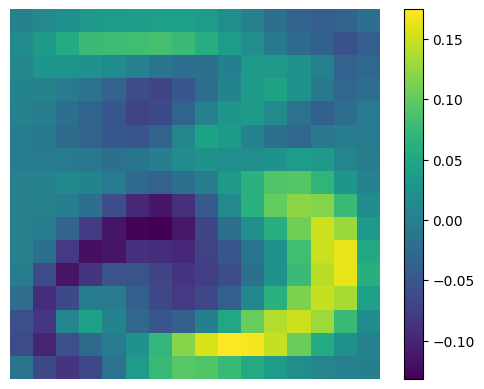

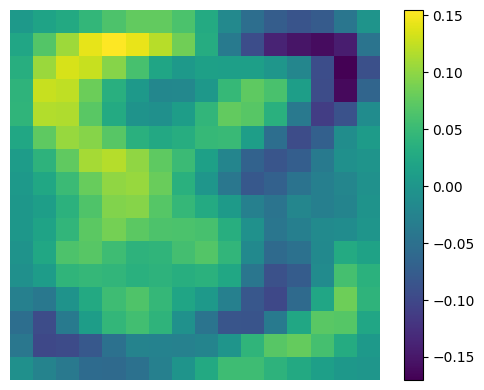

[ 136.209 -242.628]
[-312.687  649.573]
average reconstruction error: 1405766.851


/var/folders/sl/tj9x552d27vft1rr9h0v5s4m0000gn/T/ipykernel_3476/3092024654.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig7.show()


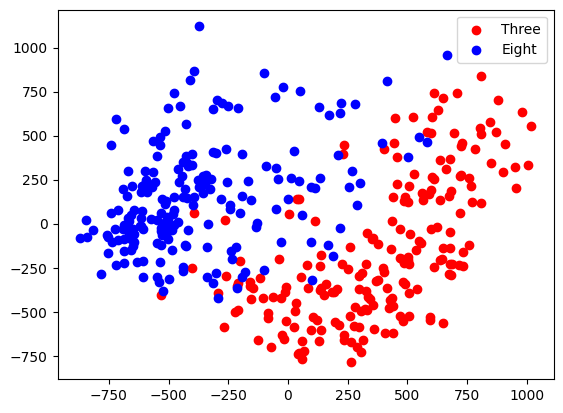

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def visualization_savefig(mat, figname):
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    ax.set_axis_off()
    plt.colorbar(im)
    fig.savefig(figname)
    plt.show()

# part (a)
three = pd.read_csv('three.txt', delimiter=' ', header=None)
three.drop(three.columns[256],axis=1, inplace=True)
line = 0
three_line1 = np.array(three.iloc[line, :])
# visualization_savefig(three_line1.reshape([16, 16], order='F'), "fig1a_three.pdf")
# figa1, axa1 = plt.subplots()
# axa1.imshow(three_line1.reshape([16, 16], order='F'))
# figa1.show()

eight = pd.read_csv('eight.txt', delimiter=' ', header=None)
eight.drop(eight.columns[256],axis=1, inplace=True)
line = 0
eight_line1 = np.array(eight.iloc[line, :])
# figa2, axa2 = plt.subplots()
# axa2.imshow(eight_line1.reshape([16, 16], order='F'))
# figa2.show()
# visualization_savefig(eight_line1.reshape([16, 16], order='F'), "fig1b_eight.pdf")

# part (b)
x = np.vstack((np.array(three), np.array(eight)))
x_bar = x.mean(axis=0)
# visualization_savefig(x_bar.reshape([16, 16], order='F'), "fig2_x_bar.pdf")

# part (c)
x_centered = x - x_bar
n = x_centered.shape[0]
S = np.matmul(x_centered.transpose(), x_centered) / (n-1)
print(np.round(S[:5, :5], 3))
# [[  59.16729323  142.14943609   28.68201754   -7.17857143  -14.3358396 ]
#  [ 142.14943609  878.93879073  374.13731203   24.12778195  -87.12781955]
#  [  28.68201754  374.13731203 1082.9058584   555.2268797    33.72431078]
#  [  -7.17857143   24.12778195  555.2268797  1181.24408521  777.77192982]
#  [ -14.3358396   -87.12781955   33.72431078  777.77192982 1429.95989975]]

# part (d)
w, v = np.linalg.eig(S)
ind = w.argsort()[-2:][::-1]

v1 = v[:, 0]
v2 = v[:, 1]
print(np.round(w[ind], 3))
# center and re-scale the image
visualization_savefig(v1.reshape((16, 16), order='F'), "fig4a_v1.pdf")
visualization_savefig(v2.reshape((16, 16), order='F'), "fig4b_v2.pdf")

# v1_cs = v1 - v1.min()
# v1_cs = v1_cs / v1_cs.max() * 255
# visualization_savefig(v1_cs.reshape((16, 16), order="F"), "testv1_2")


# part (e)
V = np.hstack((v1.reshape(-1, 1), v2.reshape(-1, 1)))
x_projected = np.matmul(x_centered, V)
coord_first_three = x_projected[0]
coord_first_eight = x_projected[200]
print(np.round(coord_first_three, 3))
print(np.round(coord_first_eight, 3))
# [40.238  2.749]
# [ 36.827 -67.021]

# part (f)
cumsum = 0
for i in range(n):
    ele = np.linalg.norm(np.matmul(x_centered[i, :], np.matmul(V, V.transpose())) - x_centered[i, :]) ** 2
    cumsum += ele
ave_rec_err = cumsum / n
print(f"average reconstruction error: {np.round(ave_rec_err, 3)}")

# part (g)
fig7, ax7 = plt.subplots()
ax7.scatter(x_projected[0:200, 0], x_projected[0:200, 1], color='red')
ax7.scatter(x_projected[200:400, 0], x_projected[200:400, 1], color='blue')
ax7.legend(("Three", "Eight"))
fig7.savefig("fig7_2d_point_cloud.pdf")
fig7.show()


In [32]:
cumsum/400

1405766.8512888828

In [31]:
n

400